In [ ]:
# Import the Libraries : 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Input
import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, add,Dropout,Dense,Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, Callback

import sklearn
from sklearn.metrics import precision_recall_fscore_support
from numpy import save

In [ ]:
# Load the data set to the Google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we pass the data set into different pakages
mini_batch_size = 700

In [ ]:
y_train=np.load('/content/drive/MyDrive/train/Y_final_MEL_train.npy',mmap_mode= 'r')
print(y_train.shape)

(13253, 100, 1, 88)


In [ ]:
X_train=np.load('/content/drive/MyDrive/train/X_final_MEL_train.npy',mmap_mode= 'r')
print(X_train.shape)

(13253, 100, 1, 252)


In [ ]:
X_validation=np.load('/content/drive/MyDrive/MEL-val/X_final_MEL_val.npy',mmap_mode= 'r')
print(X_validation.shape)

(2953, 100, 1, 252)


In [ ]:
y_validation=np.load('/content/drive/MyDrive/MEL-val/Y_final_MEL_val.npy',mmap_mode= 'r')
print(y_validation.shape)

(2953, 100, 1, 88)


In [ ]:
X_test=np.load('/content/drive/MyDrive/MEL-val/X_final_MEL_val.npy',mmap_mode= 'r')
print(X_test.shape)

(2953, 100, 1, 252)


In [ ]:
y_test=np.load('/content/drive/MyDrive/MEL-val/Y_final_MEL_val.npy',mmap_mode= 'r')
print(y_test.shape)

(2953, 100, 1, 88)


In [ ]:
# X_train = np.expand_dims(X_train,axis=-2)
# y_train= np.expand_dims(y_train,axis=-2) 

In [ ]:
# X_validation = np.expand_dims(X_validation,axis=-2)
# y_validation= np.expand_dims(y_validation,axis=-2) 

In [ ]:
# print(y_train.shape)
# print(X_train.shape)
# print(X_validation.shape)
# print(y_validation.shape)

In [ ]:
# X=X[:Y.shape[0],:]
# print(X.shape)

In [ ]:
# # Dividing the data in train, test and validation
# # 20% data in test_size , 20% in validation_set and rest in test_set
# from sklearn.model_selection import train_test_split
# test_size = 0.2
# validation_size = 0.2

# #train test split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    
# # create train validation split
# X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

In [ ]:
# print(X.shape)
# print(Y.shape)

In [ ]:
# The X_train is converted to 4 dimension with a mini_batch size of 400 
X_train = X_train[:int(X_train.shape[0]/mini_batch_size)*mini_batch_size,:]
print(X_train.shape)

(12600, 100, 1, 252)


In [ ]:
# The Y_train is converted to 4 dimension with a mini_batch size of 400 similar to X_train
y_train = y_train[:int(y_train.shape[0]/mini_batch_size)*mini_batch_size,:]
print(y_train.shape)

(12600, 100, 1, 88)


In [ ]:
X_validation = X_validation[:int(X_validation.shape[0]/mini_batch_size)*mini_batch_size,:]
print(X_validation.shape)

(2800, 100, 1, 252)


In [ ]:
y_validation = y_validation[:int(y_validation.shape[0]/mini_batch_size)*mini_batch_size,:]
print(y_validation.shape)

(2800, 100, 1, 88)


In [ ]:
# Shapes of both X_train and y_train)
print(X_train.shape)
print(y_train.shape)

(12600, 100, 1, 252)
(12600, 100, 1, 88)


In [ ]:
# shape of validation set :
print(X_validation.shape)
print(y_validation.shape)

(2800, 100, 1, 252)
(2800, 100, 1, 88)


In [ ]:
# preparing test and validation data
train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_data = train_data.batch(mini_batch_size)

validation_data = tf.data.Dataset.from_tensor_slices((X_validation,y_validation))
validation_data = validation_data.batch(mini_batch_size)

In [ ]:
# parameters for the layers of neural network 
window_size=7
min_midi = 21
max_midi = 108
note_range = max_midi - min_midi + 1

In [ ]:
# layers of Model 
input_shape=(None,100,1,252) #number of samples
model=Sequential()

# 1st Layer 
model.add(Conv2D(filters=32, kernel_size=(5,4),padding="same", activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

# 2nd Layer 
model.add(Conv2D(filters=32, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(1, 2),padding="same"))

#stage3
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# 4th Layer 
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Output Layer
model.add(Dense(88, activation='sigmoid'))

In [ ]:
# Code for the Accuracy of the Model 
class AccuracyHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [ ]:
# Calculating the accuracy of the model using adam as optimizer and the learning rate is 0.001
optimizer1 = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer= optimizer1, metrics=['accuracy'])
history = AccuracyHistory()

# checkpoint = ModelCheckpoint(model_ckpt,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
# early_stop = EarlyStopping(patience=10, monitor='val_loss',verbose=1, mode='min')
callbacks = [history]

In [ ]:
history=model.fit(train_data,epochs=30,batch_size=mini_batch_size,validation_data=validation_data, verbose = 1, callbacks=callbacks)

Epoch 1/30
18/18 [==============================] - 171s 8s/step - loss: 0.1743 - accuracy: 0.0418 - val_loss: 0.1752 - val_accuracy: 0.0386
Epoch 2/30
18/18 [==============================] - 140s 8s/step - loss: 0.1724 - accuracy: 0.0441 - val_loss: 0.1740 - val_accuracy: 0.0360
Epoch 3/30
18/18 [==============================] - 130s 7s/step - loss: 0.1704 - accuracy: 0.0466 - val_loss: 0.1726 - val_accuracy: 0.0360
Epoch 4/30
18/18 [==============================] - 131s 7s/step - loss: 0.1688 - accuracy: 0.0500 - val_loss: 0.1711 - val_accuracy: 0.0472
Epoch 5/30
18/18 [==============================] - 130s 7s/step - loss: 0.1673 - accuracy: 0.0534 - val_loss: 0.1696 - val_accuracy: 0.0527
Epoch 6/30
18/18 [==============================] - 134s 7s/step - loss: 0.1655 - accuracy: 0.0571 - val_loss: 0.1690 - val_accuracy: 0.0469
Epoch 7/30
18/18 [==============================] - 136s 8s/step - loss: 0.1640 - accuracy: 0.0614 - val_loss: 0.1681 - val_accuracy: 0.0534
Epoch 8/30
18

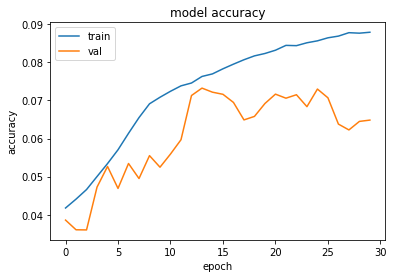

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

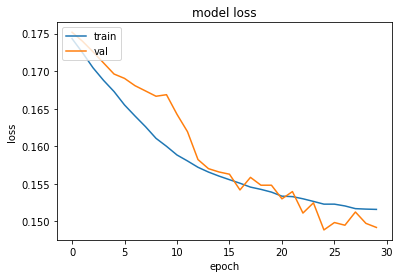

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Summary of the Model and dimension of different layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 100, 1, 32)        161312    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 100, 1, 32)        128       
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 100, 1, 32)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 100, 1, 32)        9248      
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 100, 1, 32)        128       
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 100, 1, 32)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap multiple                  0

In [ ]:
def opt_thresholds(y_true,y_scores):
    othresholds = np.zeros(y_scores.shape[1])
    print(othresholds.shape)
    for label, (label_scores, true_bin) in enumerate(zip(y_scores.T,y_true.T)):
        # print(type_of_target(y_test))
        precision, recall, thresholds = sklearn.metrics.precision_recall_curve(true_bin, label_scores)
        max_f1 = 0
        max_f1_threshold = .5
        for r, p, t in zip(recall, precision, thresholds):
            if p + r == 0: continue
            if (2*p*r)/(p + r) > max_f1:
                max_f1 = (2*p*r)/(p + r)
                max_f1_threshold = t
        # print("label %f: max_f1_threshold %f => max_f1 %f" %(label, max_f1_threshold, max_f1))
        othresholds[label] = max_f1_threshold
    return othresholds

In [ ]:
x, y_true=X_validation, y_validation
y_scores=model.predict(x)
y_scores=np.reshape(y_scores, (280000, 88))
y_validation=np.reshape(y_validation, (280000, 88))
thresholds = opt_thresholds(y_true,y_scores)

#evaludate this over validation data
y_pred = y_scores > thresholds
#precision, recall, fbetascore, support =>p, r, f, s
p,r,f,s = sklearn.metrics.precision_recall_fscore_support(y_true,y_pred,average='micro')
print("%f %f %f" %(p, r, f))

(88,)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


0.327799 0.534852 0.406477


In [ ]:
y_scores_test=model.predict(X_test)
#evaludate this over test data so that we get a 4D boolean matrix
y_pred_test = y_scores_test > thresholds

In [ ]:
y_pred_test=np.squeeze(y_pred_test, axis=-2)
print(y_pred_test.shape)

(2953, 100, 88)


In [ ]:
#saving the y_pred_test for further post processing and generating piano roll
save('MEL2.npy', y_pred_test)